In [33]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action="ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [34]:
df = pd.read_csv('train.csv', parse_dates=['date'],index_col=['date'])

In [35]:
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [36]:
df.dtypes

store    int64
item     int64
sales    int64
dtype: object

In [37]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

In [38]:
df

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5
...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2
2017-12-28,10,50,59,28,12,2017,3
2017-12-29,10,50,74,29,12,2017,4


In [39]:
df_test = pd.read_csv('test.csv',parse_dates=['date'],index_col=['date'])

In [40]:
df_test

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1
...,...,...,...
2018-03-27,44995,10,50
2018-03-28,44996,10,50
2018-03-29,44997,10,50


In [41]:
x_train = df.loc[df['year'] < 2017].drop(['sales','day', 'dayofweek'], axis=1)
y_train = df.loc[df['year'] < 2017, 'sales']

x_test = df.loc[df['year'] >= 2017].drop(['sales','day', 'dayofweek'], axis=1).reset_index(drop=True)
y_test = df.loc[df['year'] >= 2017, 'sales'].reset_index(drop=True)

In [14]:
!pip install xgboost

  Using cached xgboost-1.4.1-py3-none-win_amd64.whl (97.8 MB)


In [42]:
import xgboost as xgb
def xboost(x_train, y_train, x_test):
    """Trains xgboost model and returns Series of predictions for x_test"""
    dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=list(x_train.columns))
    dtest = xgb.DMatrix(x_test, feature_names=list(x_test.columns))

    params = {'max_depth':3,
              'eta':0.2,
              'silent':1,
              'subsample':1}
    num_rounds = 1500

    bst = xgb.train(params, dtrain, num_rounds)
    
    return pd.Series(bst.predict(dtest))

In [43]:
preds = xboost(x_train, y_train, x_test)

[11:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [44]:
preds

0         14.108516
1         14.108516
2         14.108516
3         14.108516
4         14.108516
            ...    
182495    62.137215
182496    62.137215
182497    62.137215
182498    62.137215
182499    62.137215
Length: 182500, dtype: float32

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
 mean_absolute_percentage_error(y_test,preds)

16.888972725371428

In [24]:
from sklearn.metrics import mean_squared_error

ms = mean_squared_error(y_test, preds, squared=False)
ms

11.957239262111814

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,preds)
r2

0.8563878337659774

<AxesSubplot:ylabel='Density'>

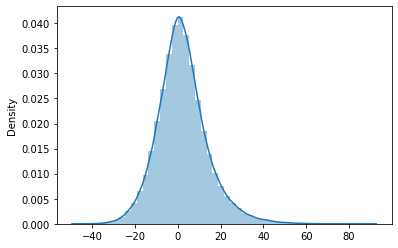

In [26]:
import seaborn as sns
sns.distplot(y_test-preds)

In [30]:
from sklearn.metrics import mean_absolute_error

MAPE_5_XGBOOST = mean_absolute_error(y_test, preds)
MAPE_5_XGBOOST

8.920387008201912

In [32]:
import pickle
## open a file , where you want to store the data
file = open('XGBoost.pkl','wb')

##dump information to that file
pickle.dump(bst, file)

NameError: name 'bst' is not defined